In [99]:
import pandas
import matplotlib.pyplot as pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [100]:
clean_dataset = pandas.read_csv('df_banco_final.csv', sep=';')

In [101]:
y = clean_dataset['default']
x = clean_dataset.drop('default', axis=1)

In [102]:
x.head()

,account_check_status,credit_history,savings,present_emp_since,installment_as_income_perc,other_debtors,property,other_installment_plans,housing,credits_this_bank,job,telephone,foreign_worker,estado_civil,rango_plazos_credito,rango_edad
0,1,5,1,1,4,1,1,3,2,2,3,1,1,1,1,5
1,2,3,5,3,2,1,1,3,2,1,3,0,1,0,4,1
2,4,5,5,2,2,1,1,3,2,1,2,0,1,1,1,3
3,1,3,5,2,2,3,2,3,3,1,3,0,1,1,4,3
4,1,4,5,3,3,1,4,3,3,2,3,0,1,1,2,4


In [103]:
norm = StandardScaler()
x_normalized = norm.fit_transform(x)
x_normalized

array([[-1.06271653,  1.50687935, -2.01779722, ...,  1.06039189,
        -1.05547493,  2.80548   ],
       [-0.25059691, -0.33157912,  0.68482522, ..., -0.94304758,
         1.95811766, -0.85668504],
       [ 1.37364232,  1.50687935,  0.68482522, ...,  1.06039189,
        -1.05547493,  0.97439748],
       ...,
       [-1.06271653, -2.17003758,  0.68482522, ..., -0.94304758,
        -1.05547493, -0.85668504],
       [-0.25059691, -0.33157912,  0.68482522, ..., -0.94304758,
        -0.05094407, -0.85668504],
       [-1.06271653, -0.33157912,  0.68482522, ..., -0.94304758,
        -1.05547493, -0.85668504]])

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.3, random_state=123)

In [105]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [106]:
predictions

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,

## Evaluamos el modelo

### Matriz de confusión

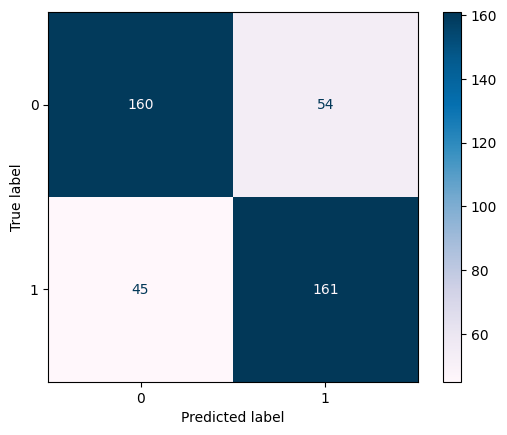

In [107]:
confmatrix = confusion_matrix(y_test, predictions)
confmatrix

visual_confmatrix = ConfusionMatrixDisplay(confmatrix)
visual_confmatrix.plot(cmap='PuBu')

In [108]:
confmatrix

array([[160,  54],
       [ 45, 161]], dtype=int64)

In [109]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
rocauc = roc_auc_score(y_test, predictions)

In [110]:
tn = confmatrix[0][0]
fp = confmatrix[0][1]
specificity = tn/(tn + fp)
specificity

0.7476635514018691

In [111]:
model_scores = {
  'model': 'KNeighborsClassifier',
  'accuracy': accuracy,
  'precision': precision,
  'recall': recall,
  'f1_score': f1,
  'roc_auc_score': rocauc,
  'specificity' : specificity
}
model_scores

{'model': 'KNeighborsClassifier',
 'accuracy': 0.7642857142857142,
 'precision': 0.7488372093023256,
 'recall': 0.7815533980582524,
 'f1_score': 0.7648456057007125,
 'roc_auc_score': 0.7646084747300609,
 'specificity': 0.7476635514018691}

In [112]:
def save_scores(model_scores: dict):
  status = []
  #Utilizamos un try-except en caso de que el archivo no exista que cree uno
  try:
    #Si el archivo existe continúa por acá
    scores = pandas.read_csv('scores.csv', sep=';')
    status.append('El archivo existe')
    exist = model_scores['model'] in scores['model'].values
    #Validamos si el modelo ya existe en el archivo de scores
    if (exist):
      #Si el modelo ya existe reemplazamos sus valores
      status.append('El modelo existe')
      criteria = scores['model'] == model_scores['model']
      index = scores[criteria].index[0]
      scores.iloc[index] = model_scores
      status.append('Se reemplazaron los valores del modelo')
    else:
      #Si el modelo no existe lo agregamos
      status.append('El modelo no existe')
      df_model_scores = pandas.DataFrame(model_scores, index=[0])
      scores = pandas.concat([scores, df_model_scores], ignore_index=True)
      status.append('Se añadió modelo nuevo y sus valores')
  except:
    #Si no existe el archivo lo creamos y cargamos los scores del modelo
    status.append('El archivo no existe')
    scores = pandas.DataFrame(model_scores, index=[0])

  status.append('Se sobrescrive el archivo scores.csv con valores nuevos')
  scores.to_csv('scores.csv', sep=';', index=False)
  return status

In [113]:
save_scores(model_scores)

['El archivo existe',
 'El modelo existe',
 'Se reemplazaron los valores del modelo',
 'Se sobrescrive el archivo scores.csv con valores nuevos']

In [114]:
from sklearn.model_selection import KFold

In [115]:
kfolds = KFold(n_splits=5, shuffle=True)

In [116]:
from sklearn.model_selection import cross_val_score

In [117]:
accuracy_crossval = cross_val_score(
  estimator=model,
  X=x_train,
  y=y_train,
  scoring='accuracy',
  cv=kfolds
)
accuracy_crossval.mean()

0.7448979591836735

In [118]:
from sklearn.model_selection import RandomizedSearchCV

In [119]:
knn = KNeighborsClassifier()

In [120]:
knn_hiperparams = {
  'n_neighbors': [4, 6, 8, 10, 12, 14],
  'weights': ['uniform', 'distance'],
  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
  'leaf_size': [10, 20, 30, 40, 50, 60, 70],
  'p': [1, 2]
}

In [121]:
randomsearch_knn_model = RandomizedSearchCV(
  knn,
  knn_hiperparams,
  n_iter=320,
  cv=kfolds,
  scoring='accuracy',
  n_jobs=-1
)

In [122]:
randomsearch_fit = randomsearch_knn_model.fit(x_train, y_train)

In [125]:
randomsearch_fit.best_score_

0.7908163265306122

In [126]:
randomsearch_fit.best_params_

{'weights': 'distance',
 'p': 1,
 'n_neighbors': 4,
 'leaf_size': 40,
 'algorithm': 'ball_tree'}

In [130]:
knn_optimized = KNeighborsClassifier(
  weights= 'distance', 
  p=1,
  n_neighbors=4,
  leaf_size=40,
  algorithm='ball_tree'
)
knn_optimized.fit(x_train, y_train)
knn_optimized_predictions = knn_optimized.predict(x_test)

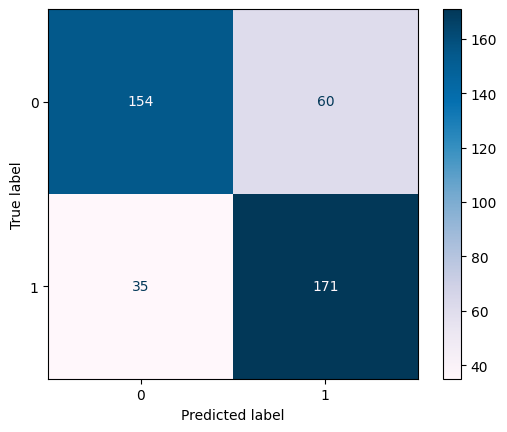

In [132]:
confmatrix = confusion_matrix(y_test, knn_optimized_predictions)
confmatrix

visual_confmatrix = ConfusionMatrixDisplay(confmatrix)
visual_confmatrix.plot(cmap='PuBu')

In [133]:
accuracy = accuracy_score(y_test, knn_optimized_predictions)
precision = precision_score(y_test, knn_optimized_predictions)
recall = recall_score(y_test, knn_optimized_predictions)
f1 = f1_score(y_test, knn_optimized_predictions)
rocauc = roc_auc_score(y_test, knn_optimized_predictions)
tn = confmatrix[0][0]
fp = confmatrix[0][1]
specificity = tn/(tn + fp)

In [134]:
model_scores = {
  'model': 'KNeighborsClassifier_optimized',
  'accuracy': accuracy,
  'precision': precision,
  'recall': recall,
  'f1_score': f1,
  'roc_auc_score': rocauc,
  'specificity' : specificity
}
model_scores

{'model': 'KNeighborsClassifier_optimized',
 'accuracy': 0.7738095238095238,
 'precision': 0.7402597402597403,
 'recall': 0.8300970873786407,
 'f1_score': 0.782608695652174,
 'roc_auc_score': 0.7748616278014698,
 'specificity': 0.719626168224299}

In [135]:
save_scores(model_scores)

['El archivo existe',
 'El modelo no existe',
 'Se añadió modelo nuevo y sus valores',
 'Se sobrescrive el archivo scores.csv con valores nuevos']